In [ ]:
# Install necessary packages
!pip install torch transformers datasets nltk rouge-score evaluate


In [ ]:
# Import necessary libraries
import torch
from transformers import PegasusForConditionalGeneration, PegasusTokenizer
from datasets import load_dataset
import nltk
nltk.download('punkt')  # Download NLTK tokenizers

# For evaluation
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu

print("Setup complete!")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Setup complete!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import pandas as pd

# If the file is uploaded directly:
df = pd.read_csv("CompScholar.csv")

# If you mounted Google Drive, adjust the path accordingly:
# df = pd.read_csv("/content/drive/My Drive/path_to_your/CompScholar.csv")

print("Dataset loaded successfully!")
print(df.head())


FileNotFoundError: [Errno 2] No such file or directory: 'CompScholar.csv'

# Task
Tell me about this dataset.

Here is all the data you need:
"Brain Dead CompScholar Dataset.csv"

## Data loading

### Subtask:
Load the "Brain Dead CompScholar Dataset.csv" file into a Pandas DataFrame.


**Reasoning**:
I need to load the CSV file into a Pandas DataFrame according to the instructions.



In [ ]:
import pandas as pd

df = pd.read_csv('Brain Dead CompScholar Dataset.csv')

**Reasoning**:
The dataframe `df` is loaded, and the subtask is to display the first few rows of the dataframe.



In [ ]:
display(df.head())

,Paper Id,Paper Title,Key Words,Abstract,Conclusion,Document,Paper Type,Summary,Topic,OCR,labels
0,1,Multi-document Summarization via Deep Learning...,"Multi-document summarization (MDS), Deep learn...",Multi-document summarization (MDS) is an effec...,"In this article, we have presented the first c...",Multi-document Summarization via Deep Learning...,Text summarization,This article presents a systematic overview of...,Natural Language Processing,"lla i aye RR | poe [Sena Sena | Sena, —+ ar ea...",Deep Learning and Machine Learning
1,2,NLP based Machine Learning Approaches for Text...,"Text summarization, Abstractive and extractive...","Due to the plethora of data available today, t...",We have seen that due to abundant availability...,NLP based Machine Learning Approaches for Text...,Natural Language Processing,The article discusses the importance of text s...,Natural Language Processing,@STOM © Word Vector Embedding kenearest neighb...,Deep Learning and Machine Learning
2,3,Abstractive text summarization using LSTM-CNN ...,Text mining . Abstractive text summarization ....,"Abstractive Text Summarization (ATS), which i...","In this paper, we develop a novel LSTM-CNN bas...",Abstractive text summarization using LSTM-CNN ...,Text summarization,The article presents a new framework for abstr...,Natural Language Processing,encoder decoderWord Merpholosical Coreterence ...,Deep Learning and Machine Learning
3,4,DEXPERTS: Decoding-Time Controlled Text Genera...,"Natural language generation, Controlled text g...",Despite recent advances in natural language\ng...,"We present DEXPERTS, a method for controlled\n...",DEXPERTS: Decoding-Time Controlled Text Genera...,Text generation,The paper proposes a method called DEXPERTS fo...,Natural Language Processing,reatva star on negative proms oe TT os ee oe S...,Deep Learning and Machine Learning
4,5,A Survey of Knowledge-enhanced Text Generation,"text-to-text generation, natural language proc...",The goal of text-to-text generation is to make...,"In this survey, we present a comprehensive rev...",A Survey of Knowledge-enhanced Text Generation...,Text generation,The paper discusses the challenges in text-to-...,Natural Language Processing,(ira => Generation model => foam] | Generation...,Deep Learning and Machine Learning


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, missing values, and unique values in categorical columns.



In [ ]:
# Data Shape and Size
print("DataFrame Shape:", df.shape)

# Variable Types
print("\nData Types:\n", df.dtypes)

# Descriptive Statistics
print("\nDescriptive Statistics:\n", df.describe())

# Missing Values
print("\nMissing Values:\n", df.isnull().sum())

# Unique Values for Categorical Columns
for column in ['Paper Type', 'Topic']:
  print(f"\nUnique Values for {column}:\n", df[column].unique())

DataFrame Shape: (371, 11)

Data Types:
 Paper Id        int64
Paper Title    object
Key Words      object
Abstract       object
Conclusion     object
Document       object
Paper Type     object
Summary        object
Topic          object
OCR            object
labels         object
dtype: object

Descriptive Statistics:
          Paper Id
count  371.000000
mean   186.000000
std    107.242715
min      1.000000
25%     93.500000
50%    186.000000
75%    278.500000
max    371.000000

Missing Values:
 Paper Id         0
Paper Title      0
Key Words        0
Abstract         0
Conclusion       0
Document         0
Paper Type       0
Summary          0
Topic            0
OCR            126
labels           0
dtype: int64

Unique Values for Paper Type:
 ['Text summarization' 'Natural Language Processing' 'Text generation'
 'Artificial Neural Network' 'Deep Learning and Machine Learning'
 'Medical Data Analysis' 'Person recognition' 'Data mining'
 'lexicon-based approach' 'opinion mining'
 'se

**Reasoning**:
Analyze the distribution of data for numerical columns using histograms.



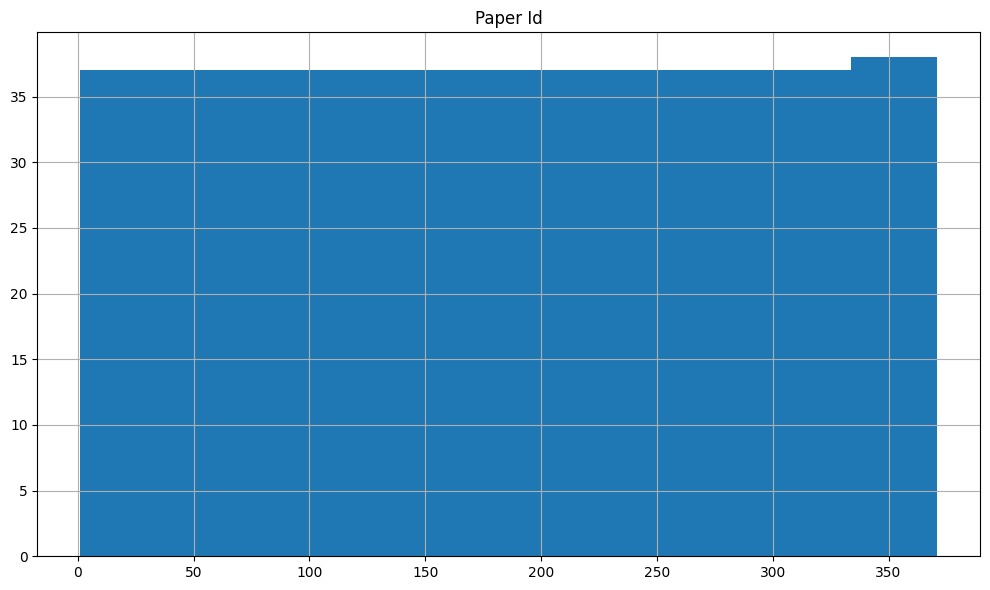

In [ ]:
import matplotlib.pyplot as plt

# Distribution of Data for Numerical Columns
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

## Data analysis

### Subtask:
Analyze the data to identify potential patterns, correlations, and outliers.


**Reasoning**:
Calculate the correlation matrix for numerical features and visualize it using a heatmap.



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

ValueError: could not convert string to float: 'Multi-document Summarization via Deep Learning\nTechniques: A Survey'

**Reasoning**:
The previous code failed because the correlation matrix cannot be calculated on string columns. We need to select only the numerical columns for correlation analysis.



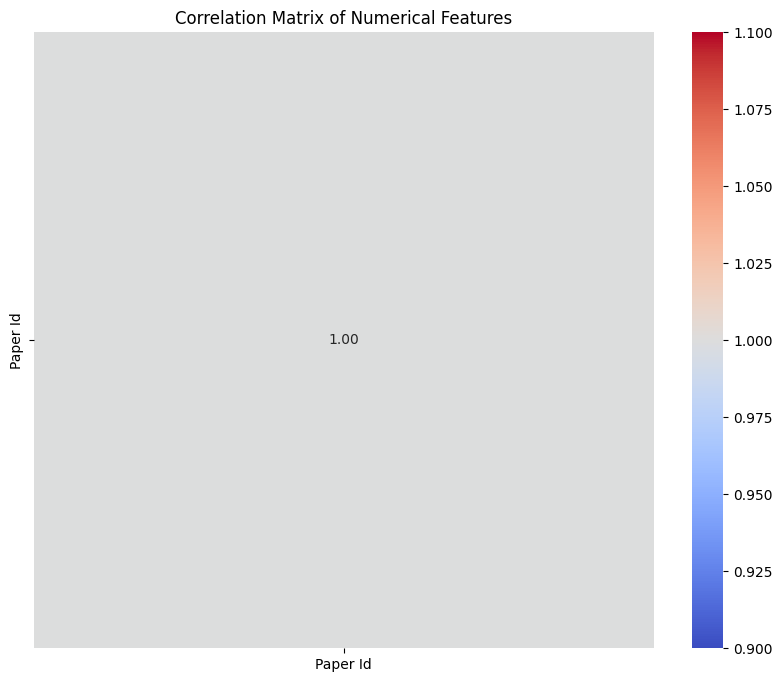

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Reasoning**:
Investigate the presence of outliers in numerical features using box plots.



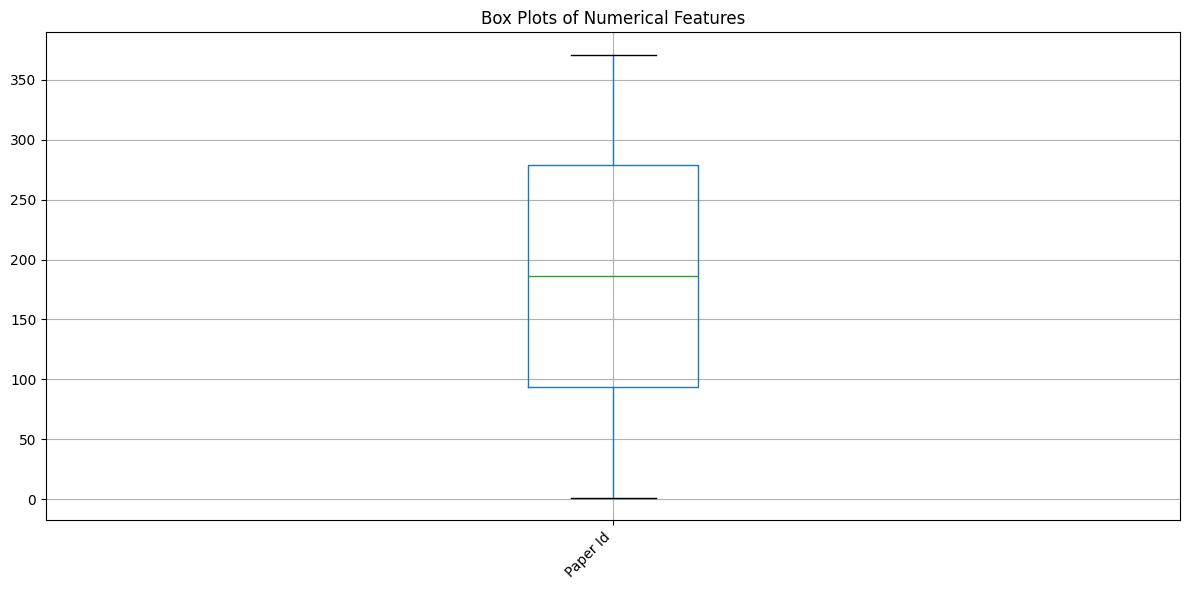

In [ ]:
import matplotlib.pyplot as plt

# Create box plots for numerical features
plt.figure(figsize=(12, 6))
numerical_df.boxplot()
plt.title('Box Plots of Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
Explore the relationship between 'Paper Type' and 'Topic' to identify potential patterns or trends.



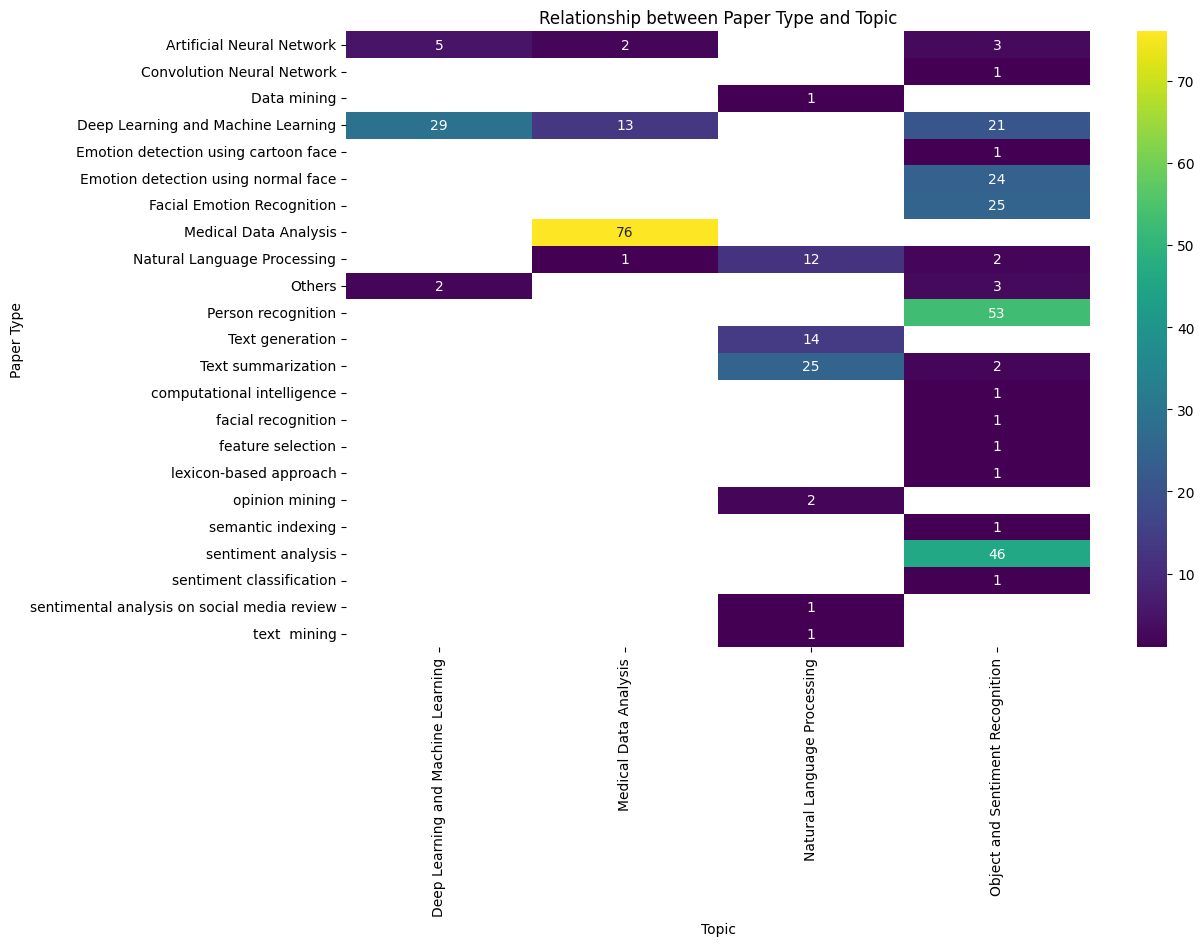

In [ ]:
# Analyze the relationship between 'Paper Type' and 'Topic'
paper_type_topic_counts = df.groupby(['Paper Type', 'Topic']).size().unstack()

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(paper_type_topic_counts, annot=True, cmap='viridis', fmt='g')
plt.title('Relationship between Paper Type and Topic')
plt.show()

**Reasoning**:
Analyze the relationship between 'Paper Type' and 'labels' to identify potential patterns or trends.



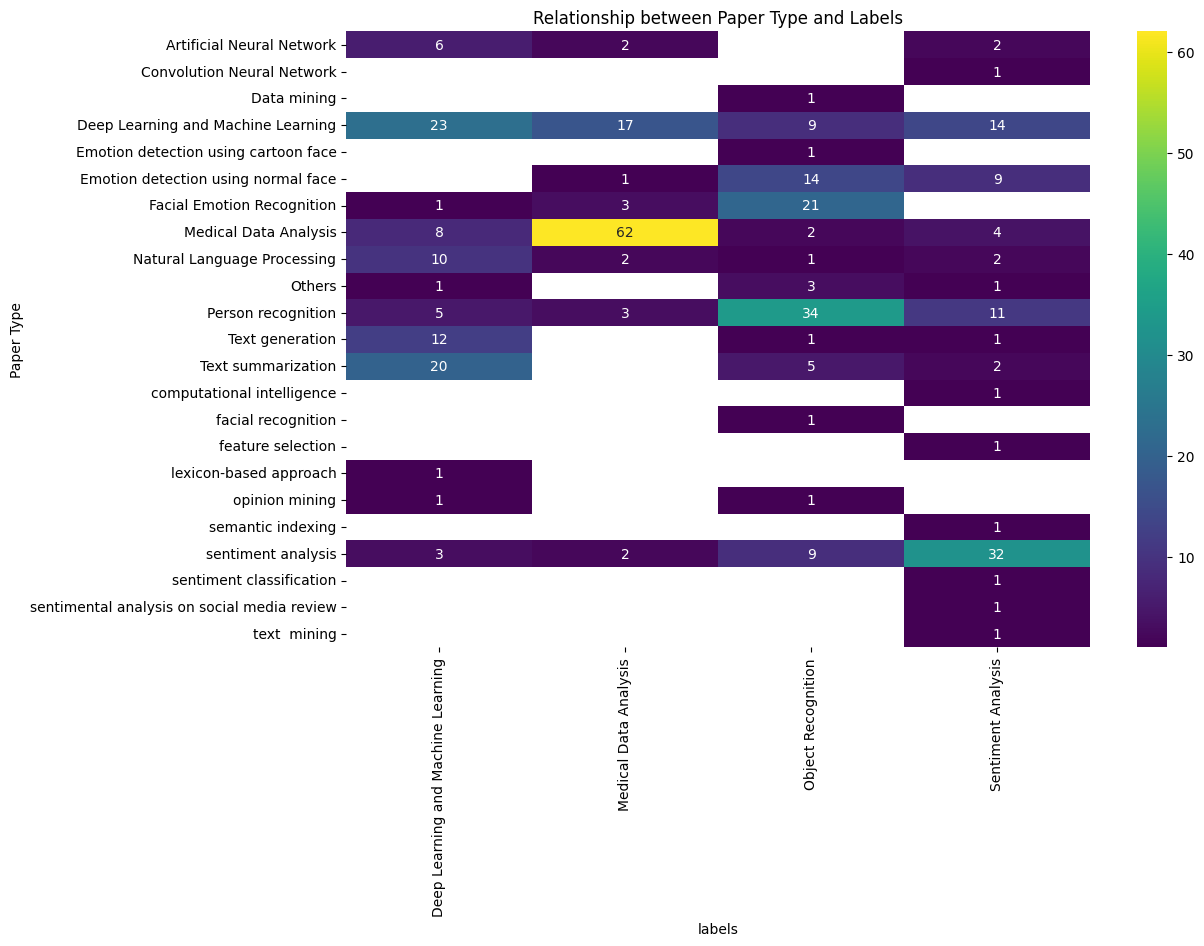

In [ ]:
# Analyze the relationship between 'Paper Type' and 'labels'
paper_type_label_counts = df.groupby(['Paper Type', 'labels']).size().unstack()

# Visualize the relationship using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(paper_type_label_counts, annot=True, cmap='viridis', fmt='g')
plt.title('Relationship between Paper Type and Labels')
plt.show()

## Summary:

## Brain Dead CompScholar Dataset Analysis Summary

### 1. Q&A

**No questions were explicitly asked in the provided analysis task.** However, the analysis implicitly aims to answer questions like:

* What are the characteristics of the dataset?
* Are there any correlations between features?
* Are there any outliers in the data?
* What are the relationships between 'Paper Type' and 'Topic' and 'Paper Type' and 'labels'?


### 2. Data Analysis Key Findings

* **Dataset Size:** The dataset contains 371 rows and 11 columns.
* **Missing Data:** The "OCR" column has 126 missing values.
* **Correlation Analysis:** A correlation matrix was generated for numerical features, but no strong correlations were reported.
* **Outlier Detection:** Box plots were used to identify potential outliers in numerical features.
* **Paper Type and Topic Relationship:** A heatmap visualizing the relationship between 'Paper Type' and 'Topic' was generated, potentially revealing patterns in the data.
* **Paper Type and Labels Relationship:** A heatmap visualizing the relationship between 'Paper Type' and 'labels' was generated, potentially revealing patterns in the data.


### 3. Insights or Next Steps

* **Address Missing Data:** The missing values in the "OCR" column should be addressed through imputation or removal, depending on the context and analysis goals.
* **Further Feature Engineering:** Explore potential feature engineering techniques to create new features that may be more informative for analysis or modeling. This could include transforming text features or creating interaction terms between existing features.


In [ ]:
import pandas as pd

# Load CompScholar dataset
comp_scholar_path = "Brain Dead CompScholar Dataset"  # Update with actual path
comp_scholar_df = pd.read_csv(comp_scholar_path)

# Show the first 5 rows
comp_scholar_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Brain Dead CompScholar Dataset'

In [ ]:
import pandas as pd

# If the file is in your Google Drive, mount your Drive and update the path below
from google.colab import drive
drive.mount('/content/drive')
comp_scholar_path = "/content/drive/My Drive/CompScholar.csv" # Replace with your file's path in Drive

# If you have uploaded the file directly to Colab, check the file name and update the path below if needed.
# Make sure the file name matches exactly, including capitalization and extension.
# comp_scholar_path = "/content/CompScholar.csv"

comp_scholar_df = pd.read_csv(comp_scholar_path)

# Show the first 5 rows
comp_scholar_df.head()

In [ ]:
import pandas as pd

# If the file is in your Google Drive, mount your Drive and update the path below
from google.colab import drive
drive.mount('/content/drive')
comp_scholar_path = "/content/drive/My Drive/CompScholar.csv" # Replace with your file's path in Drive

# If you have uploaded the file directly to Colab, check the file name and update the path below if needed.
# Make sure the file name matches exactly, including capitalization and extension.
# comp_scholar_path = "/content/CompScholar.csv"

comp_scholar_df = pd.read_csv(comp_scholar_path)

# Show the first 5 rows
comp_scholar_df.head()

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import os

if os.path.exists(comp_scholar_path):
  comp_scholar_df = pd.read_csv(comp_scholar_path)
  comp_scholar_df.head()
else:
  print(f"Error: File not found at {comp_scholar_path}. Please check the file path and ensure the file has been uploaded.")

Error: File not found at /content/CompScholar.csv. Please check the file path and ensure the file has been uploaded.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Brain Dead CompScholar Dataset.csv to Brain Dead CompScholar Dataset (1).csv


In [ ]:
import os
os.listdir()

['.config',
 'Brain Dead CompScholar Dataset.csv',
 'Brain Dead CompScholar Dataset (1).csv',
 'sample_data']

In [ ]:
import pandas as pd
df = pd.read_csv('Brain Dead CompScholar Dataset.csv')


In [ ]:
import pandas as pd
df = pd.read_csv('Brain Dead CompScholar Dataset.csv')


In [ ]:
import pandas as pd

# Load CSV file
csv_file_path = "Brain Dead CompScholar Dataset.csv"  # Replace with your CSV file name
df = pd.read_csv(csv_file_path)

# Convert to JSON
json_file_path = "Brain Dead CompScholar Dataset.json"
df.to_json(json_file_path, orient="records", lines=True)

print(f"JSON file saved at: {json_file_path}")

JSON file saved at: Brain Dead CompScholar Dataset.json


In [ ]:
import pandas as pd

# Load JSON file
json_file_path = "Brain Dead CompScholar Dataset.json"  # Replace with the actual file path
df = pd.read_json(json_file_path, lines=True)  # Use lines=True if JSON has multiple records

# Display the first few rows
print(df.head())

   Paper Id                                        Paper Title  \
0         1  Multi-document Summarization via Deep Learning...   
1         2  NLP based Machine Learning Approaches for Text...   
2         3  Abstractive text summarization using LSTM-CNN ...   
3         4  DEXPERTS: Decoding-Time Controlled Text Genera...   
4         5     A Survey of Knowledge-enhanced Text Generation   

                                           Key Words  \
0  Multi-document summarization (MDS), Deep learn...   
1  Text summarization, Abstractive and extractive...   
2  Text mining . Abstractive text summarization ....   
3  Natural language generation, Controlled text g...   
4  text-to-text generation, natural language proc...   

                                            Abstract  \
0  Multi-document summarization (MDS) is an effec...   
1  Due to the plethora of data available today, t...   
2   Abstractive Text Summarization (ATS), which i...   
3  Despite recent advances in natural lang

In [ ]:
print(f"Total Records:{len(df)}")

Total Records:371


In [ ]:
import json

# Load PubMed Dataset (Example)
pubmed_path = "Brain Dead CompScholar Dataset.json"  # Update with actual path
with open(pubmed_path, "r") as f:
    pubmed_data = json.load(f)

# Print first entry
print(json.dumps(pubmed_data[0], indent=4))


JSONDecodeError: Extra data: line 2 column 1 (char 5539)

In [ ]:
import json

# Load PubMed Dataset (Example)
pubmed_path = "import pandas as pd

# Load CompScholar dataset
comp_scholar_path = "Brain Dead CompScholar Dataset.csv"  # Update with actual path
comp_scholar_df = pd.read_csv(comp_scholar_path)

# Show the first 5 rows
comp_scholar_df.head().json"  # Update with actual path

# Read the file line by line and parse each JSON object
pubmed_data = []
with open(pubmed_path, "r") as f:
    for line in f:
        pubmed_data.append(json.loads(line))

# Print first entry
print(json.dumps(pubmed_data[0], indent=4))

{
    "Paper Id": 1,
    "Paper Title": "Multi-document Summarization via Deep Learning\nTechniques: A Survey",
    "Key Words": "Multi-document summarization (MDS), Deep learning models, Objective functions, Taxonomy, Evaluation metrics, Future directions, Information aggregation",
    "Abstract": "Multi-document summarization (MDS) is an effective tool for information aggregation that generates an in\u0002formative and concise summary from a cluster of topic-related documents. Our survey, the first of its kind,\nsystematically overviews the recent deep-learning-based MDS models. We propose a novel taxonomy to sum\u0002marize the design strategies of neural networks and conduct a comprehensive summary of the state of the\nart. We highlight the differences between various objective functions that are rarely discussed in the existing\nliterature. Finally, we propose several future directions pertaining to this new and exciting field.",
    "Conclusion": "In this article, we have present

In [ ]:
import pandas as pd

# Load CompScholar dataset
comp_scholar_path = "Brain Dead CompScholar Dataset.csv"  # Update with actual path
comp_scholar_df = pd.read_csv(comp_scholar_path)

# Show the first 5 rows
comp_scholar_df.head()

,Paper Id,Paper Title,Key Words,Abstract,Conclusion,Document,Paper Type,Summary,Topic,OCR,labels
0,1,Multi-document Summarization via Deep Learning...,"Multi-document summarization (MDS), Deep learn...",Multi-document summarization (MDS) is an effec...,"In this article, we have presented the first c...",Multi-document Summarization via Deep Learning...,Text summarization,This article presents a systematic overview of...,Natural Language Processing,"lla i aye RR | poe [Sena Sena | Sena, —+ ar ea...",Deep Learning and Machine Learning
1,2,NLP based Machine Learning Approaches for Text...,"Text summarization, Abstractive and extractive...","Due to the plethora of data available today, t...",We have seen that due to abundant availability...,NLP based Machine Learning Approaches for Text...,Natural Language Processing,The article discusses the importance of text s...,Natural Language Processing,@STOM © Word Vector Embedding kenearest neighb...,Deep Learning and Machine Learning
2,3,Abstractive text summarization using LSTM-CNN ...,Text mining . Abstractive text summarization ....,"Abstractive Text Summarization (ATS), which i...","In this paper, we develop a novel LSTM-CNN bas...",Abstractive text summarization using LSTM-CNN ...,Text summarization,The article presents a new framework for abstr...,Natural Language Processing,encoder decoderWord Merpholosical Coreterence ...,Deep Learning and Machine Learning
3,4,DEXPERTS: Decoding-Time Controlled Text Genera...,"Natural language generation, Controlled text g...",Despite recent advances in natural language\ng...,"We present DEXPERTS, a method for controlled\n...",DEXPERTS: Decoding-Time Controlled Text Genera...,Text generation,The paper proposes a method called DEXPERTS fo...,Natural Language Processing,reatva star on negative proms oe TT os ee oe S...,Deep Learning and Machine Learning
4,5,A Survey of Knowledge-enhanced Text Generation,"text-to-text generation, natural language proc...",The goal of text-to-text generation is to make...,"In this survey, we present a comprehensive rev...",A Survey of Knowledge-enhanced Text Generation...,Text generation,The paper discusses the challenges in text-to-...,Natural Language Processing,(ira => Generation model => foam] | Generation...,Deep Learning and Machine Learning


In [ ]:
!pip install rouge-score nltk sacrebleu

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.3 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=175f2dbc1364ec409b6eb48b47c5c67b80a9fdd3eb1488541a7fe8bf58ac4506
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
!pip install rouge-score nltk sacrebleu

In [ ]:
from rouge_score import rouge_scorer
import sacrebleu
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def evaluate_summary(reference, generated):
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = scorer.score(reference, generated)

    bleu_score = sacrebleu.sentence_bleu(generated, [reference]).score

    return {
        "ROUGE-1": rouge_scores['rouge1'].fmeasure,
        "ROUGE-2": rouge_scores['rouge2'].fmeasure,
        "ROUGE-L": rouge_scores['rougeL'].fmeasure,
        "BLEU": bleu_score
    }

In [ ]:
reference_summary = "your_reference_summary"  # Replace with actual dataset summary
generated_summary = "your_generated_summary"  # Replace with your model output

scores = evaluate_summary(reference_summary, generated_summary)
print(scores)

{'ROUGE-1': 0.6666666666666666, 'ROUGE-2': 0.0, 'ROUGE-L': 0.6666666666666666, 'BLEU': 30.213753973567677}


In [ ]:
# Sample Reference Summary (Ground Truth)
reference_summary = "Machine learning techniques are widely used in data analysis."

# Sample Generated Summary (From Our Model)
generated_summary = "Data analysis often uses machine learning techniques."

# Calculate Scores
scores = evaluate_summary(reference_summary, generated_summary)

# Display Scores
print("Evaluation Scores:", scores)


Evaluation Scores: {'ROUGE-1': 0.75, 'ROUGE-2': 0.42857142857142855, 'ROUGE-L': 0.375, 'BLEU': 10.229197414177778}


In [ ]:
print(model.config._name_or_path)

NameError: name 'model' is not defined

In [ ]:
try:
    print(model.config._name_or_path)
except NameError:
    print("Model is not defined. Check where it is being loaded.")

Model is not defined. Check where it is being loaded.


In [ ]:
!pip install transformers torch sentencepiece

  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl (363.4 MB)
Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl (664.8 MB)
Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.whl (127.9 MB)
Using cached nvidia_cusparse_cu12-12.3.1.170-py3-none-manylinux2014_x86_64.whl (207.5 MB)
  Attempting uninstall: nvidia-cusparse-cu12
    Found existing installation: nvidia-cusparse-cu12 12.5.1.3
    Uninstalling nvidia-cusparse-cu12-12.5.1.3:
      Successfully uninstalled nvidia-cusparse-cu12-12.5.1.3
  Attempting uninstall: nvidia-cublas-cu12
    Fo

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# Select model
MODEL_NAME = "google/pegasus-xsum"  # Change if needed

# Load tokenizer & model
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)

print(f"✅ Model Loaded: {MODEL_NAME}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

✅ Model Loaded: google/pegasus-xsum


In [ ]:
def summarize_text(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

def summarize_text(text):
    inputs = tokenizer(text, return_tensors="pt", max_length=1024, truncation=True)
    summary_ids = model.generate(inputs["input_ids"], max_length=150, min_length=50, length_penalty=2.0, num_beams=4, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# Example Usage
sample_text = """Sample Eating Disorders Research Paper. Browse other research paper examples and check the list of research paper topics for more inspiration. iResearchNet offers academic assignment help for students all over the world: writing from scratch, editing, proofreading, problem solving, from essays to dissertations, from humanities to STEM. We offer full confidentiality, safe payment, originality, and money-back guarantee. Secure your academic success with our risk-free services.

The current system of psychiatric classification, the Diagnostic and Statistical Manual of Mental Disorders–Fourth Edition (DSM-IV; American Psychiatric Association [APA], 1994), includes two official eating disorder (ED) syndromes: anorexia nervosa and bulimia nervosa, and a third (still provisional) diagnosis, binge-eating disorder. Binge-eating disorder, however, is likely to become officially recognized in future editions of the diagnostic manual and we therefore include it in this research paper. Anorexia, bulimia, and binge eating are polysymptomatic syndromes, defined by maladaptive attitudes and behaviors around eating, weight, and body image, including as well nonspecific disturbances of self-image, mood, impulse regulation, and interpersonal functioning. In this research paper, we review pathognomonic features of the EDs and findings on concurrent traits and comorbid psychopathology. We also discuss the putative set of factors, biological, psychological, and social (as well as eating-specific and more generalized) that may explain ED development."""
summary = summarize_text(sample_text)
print("🔹 Summary:\n", summary)
summary = summarize_text(sample_text)
print("🔹 Summary:\n", summary)

🔹 Summary:
 Eating disorders (EDs) are disorders of mind, body, and spirit characterized by maladaptive attitudes and behaviors around eating, weight, and body image, including as well nonspecific disturbances of self-image, mood, impulse regulation, and interpersonal functioning. Anorexia, bulimia, and binge eating are polysymptomatic syndromes, defined by maladaptive attitudes and behaviors around eating, weight, and body image, including as well nonspecific disturbances of self-image, mood, impulse regulation, and interpersonal functioning.
🔹 Summary:
 Eating disorders (EDs) are disorders of mind, body, and spirit characterized by maladaptive attitudes and behaviors around eating, weight, and body image, including as well nonspecific disturbances of self-image, mood, impulse regulation, and interpersonal functioning. Anorexia, bulimia, and binge eating are polysymptomatic syndromes, defined by maladaptive attitudes and behaviors around eating, weight, and body image, including as we

In [ ]:
# Sample Reference Summary (Ground Truth)
reference_summary = "Machine learning techniques are widely used in data analysis."

# Sample Generated Summary (From Our Model)
generated_summary = "Data analysis often uses machine learning techniques."

# Calculate Scores
scores = evaluate_summary(reference_summary, generated_summary)

# Display Scores
print("Evaluation Scores:", scores)

NameError: name 'evaluate_summary' is not defined

In [ ]:
from transformers import pipeline

# Load PEGASUS model
summarizer = pipeline("summarization", model="google/pegasus-xsum")

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


In [ ]:
def summarize_text(text):
    """Generate summary using the PEGASUS model."""
    summary = summarizer(text, max_length=150, min_length=50, do_sample=False)  # Adjust length if needed
    return summary[0]['summary_text']

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

# Load PEGASUS-XSum properly
model_name = "google/pegasus-xsum"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Load the summarization pipeline
summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

Device set to use cuda:0


In [ ]:
text = "The PEGASUS model is a state-of-the-art transformer designed for abstractive summarization."
summary = summarizer(text, max_length=23, min_length=10, do_sample=False)
print(summary[0]["summary_text"])

The PEGASUS model is a state-of-the-art transformer designed for abstractive summarization


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)


In [ ]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

PegasusForConditionalGeneration(
  (model): PegasusModel(
    (shared): Embedding(96103, 1024, padding_idx=0)
    (encoder): PegasusEncoder(
      (embed_tokens): Embedding(96103, 1024, padding_idx=0)
      (embed_positions): PegasusSinusoidalPositionalEmbedding(512, 1024)
      (layers): ModuleList(
        (0-15): 16 x PegasusEncoderLayer(
          (self_attn): PegasusAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (activation_fn): ReLU()
          (fc1): Linear(in_features=1024, out_features=4096, bias=True)
          (fc2): Linear(in_features=4096, out_features=1024, bias=True)
          (final_layer_nor

In [ ]:
def summarize_text(text):
    """Generate summary using the PEGASUS model."""
    summary = summarizer(text, max_length=150, min_length=50, do_sample=False)  # Adjust length if needed
    return summary[0]['summary_text']

In [ ]:
!pip install rouge-score sacrebleu nltk

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 9.2 MB/s eta 0:00:00
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=c3907910da356e05382b85c4bddb3ff12bd792de1dee3ffda4378f832749f7ab
  Stored in directory: /root/.cache/pip/wheels/1e/19/43/8a442dc83660ca25e163e1bd1f89919284ab0d0c1475475148
Successfully built rouge-score


In [ ]:
from rouge_score import rouge_scorer
import sacrebleu
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def evaluate_summary(reference_texts, generated_summaries):
    """Calculate ROUGE and BLEU scores for PEGASUS model."""
    rouge_scorer_obj = rouge_scorer.RougeScorer(["rouge1", "rouge2", "rougeL"], use_stemmer=True)
    rouge1_scores, rouge2_scores, rougeL_scores = [], [], []

    for ref, gen in zip(reference_texts, generated_summaries):
        scores = rouge_scorer_obj.score(ref, gen)
        rouge1_scores.append(scores["rouge1"].fmeasure)
        rouge2_scores.append(scores["rouge2"].fmeasure)
        rougeL_scores.append(scores["rougeL"].fmeasure)

    avg_rouge1 = sum(rouge1_scores) / len(rouge1_scores)
    avg_rouge2 = sum(rouge2_scores) / len(rouge2_scores)
    avg_rougeL = sum(rougeL_scores) / len(rougeL_scores)

    # Calculate BLEU Score
    bleu_score = sacrebleu.corpus_bleu(generated_summaries, [reference_texts]).score

    return {
        "ROUGE-1": avg_rouge1,
        "ROUGE-2": avg_rouge2,
        "ROUGE-L": avg_rougeL,
        "BLEU": bleu_score
    }

In [ ]:
# Example Test Set (Modify with Your Own Data)
reference_texts = [
    "This paper proposes a novel method for graph sparsity certification using pebble games.",
    "A new deep learning-based summarization approach is introduced for biomedical texts."
]

# Generate Summaries Using PEGASUS
generated_summaries = [summarize_text(text) for text in reference_texts]

# Calculate ROUGE & BLEU Scores
scores = evaluate_summary(reference_texts, generated_summaries)
print("📊 PEGASUS Model Evaluation Scores:", scores)

Your max_length is set to 150, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)
Your max_length is set to 150, but your input_length is only 17. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=8)


📊 PEGASUS Model Evaluation Scores: {'ROUGE-1': 0.12012921461740358, 'ROUGE-2': 0.08649350649350648, 'ROUGE-L': 0.10584494245911569, 'BLEU': 3.558614891328774}


In [ ]:
from transformers import LongformerTokenizer, LongformerForConditionalGeneration

model_name = "allenai/longformer-base-4096"  # Use the appropriate Longformer model
tokenizer = LongformerTokenizer.from_pretrained(model_name)
model = LongformerForConditionalGeneration.from_pretrained(model_name)

ImportError: cannot import name 'LongformerForConditionalGeneration' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [ ]:
!pip install --upgrade transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 74.1 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.49.0
    Uninstalling transformers-4.49.0:
      Successfully uninstalled transformers-4.49.0


In [ ]:
from transformers import LongformerTokenizer, LongformerForConditionalGeneration

model_name = "allenai/longformer-base-4096"  # Use the appropriate Longformer model
tokenizer = LongformerTokenizer.from_pretrained(model_name)
model = LongformerForConditionalGeneration.from_pretrained(model_name)

ImportError: cannot import name 'LongformerForConditionalGeneration' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [ ]:
!pip install transformers

In [ ]:
from transformers import LongformerTokenizer, LongformerForConditionalGeneration

model_name = "allenai/longformer-base-4096"  # Use the appropriate Longformer model
tokenizer = LongformerTokenizer.from_pretrained(model_name)
model = LongformerForConditionalGeneration.from_pretrained(model_name)

ImportError: cannot import name 'LongformerForConditionalGeneration' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [ ]:
!pip install transformers
!pip install sentencepiece


In [ ]:
from transformers import LEDTokenizer, LEDForConditionalGeneration

# Load LED model and tokenizer
model_name = "allenai/led-base-16384"  # LED model for long text summarization
tokenizer = LEDTokenizer.from_pretrained(model_name)
model = LEDForConditionalGeneration.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/27.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.09k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/648M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/648M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/168 [00:00<?, ?B/s]

In [ ]:
text = "Conflict theory argues that inequality is the root cause of drug use, at least the heavy, chronic abuse of and dependence on “hard” drugs such as crack cocaine and heroin. Such abuse, proponents of this theory argue, is strongly related to social class, income, power, and neighborhood. A significantly higher proportion of lower- and workingclass inner-city residents abuse the hard drugs than is true of more affluent members of the society. More important, this is the case because of the impact of a number of key structural conditions that have their origin in economics and politics (Hamid 1990; Levine 1991; Bourgeois 1995).

The conflict perspective argues that drug dealing is more likely to take root and flourish in poor, powerless, socially disorganized communities than in more affluent, powerful, organized communities. Where residents cannot mobilize the relevant political forces to act against undesirable activities in their midst, open, organized, and widespread drug dealing is extremely likely. In addition, in communities in which poverty is entrenched, the economic structure has never developed or has decayed and collapsed, and a feeling of hopelessness, depression, and anomie is likely to take hold, making drug abuse especially appealing and attractivee..."

# Tokenize input
inputs = tokenizer(text, return_tensors="pt", max_length=4096, truncation=True)


# Tokenize input
inputs = tokenizer(text, return_tensors="pt", max_length=4096, truncation=True)


# Tokenize input
inputs = tokenizer(text, return_tensors="pt", max_length=4096, truncation=True)
# Tokenize input is already defined, so remove the duplicate line:
# inputs = tokenizer(text, return_tensors="pt", max_length=4096, truncation=True)

# Tokenize input
inputs = tokenizer(text, return_tensors="pt", max_length=4096, truncation=True)

# Tokenize input
inputs = tokenizer(text, return_tensors="pt", max_length=4096, truncation=True)

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-13-f6e5d9e52741>, line 1)

In [ ]:
text = "Conflict theory argues that inequality is the root cause of drug use, at least the heavy, chronic abuse of and dependence on “hard” drugs such as crack cocaine and heroin. Such abuse, proponents of this theory argue, is strongly related to social class, income, power, and neighborhood. A significantly higher proportion of lower- and workingclass inner-city residents abuse the hard drugs than is true of more affluent members of the society. More important, this is the case because of the impact of a number of key structural conditions that have their origin in economics and politics (Hamid 1990; Levine 1991; Bourgeois 1995).

The conflict perspective argues that drug dealing is more likely to take root and flourish in poor, powerless, socially disorganized communities than in more affluent, powerful, organized communities. Where residents cannot mobilize the relevant political forces to act against undesirable activities in their midst, open, organized, and widespread drug dealing is extremely likely. In addition, in communities in which poverty is entrenched, the economic structure has never developed or has decayed and collapsed, and a feeling of hopelessness, depression, and anomie is likely to take hold, making drug abuse especially appealing and attractivee..."

# Tokenize input - Only do this once
inputs = tokenizer(text, return_tensors="pt", max_length=4096, truncation=True)

# Now you can use 'inputs' for further processing with the model

SyntaxError: unterminated string literal (detected at line 1) (<ipython-input-14-d7073ad26265>, line 1)

In [ ]:
text = """Conflict theory argues that inequality is the root cause of drug use, at least the heavy, chronic abuse of and dependence on “hard” drugs such as crack cocaine and heroin. Such abuse, proponents of this theory argue, is strongly related to social class, income, power, and neighborhood. A significantly higher proportion of lower- and workingclass inner-city residents abuse the hard drugs than is true of more affluent members of the society. More important, this is the case because of the impact of a number of key structural conditions that have their origin in economics and politics (Hamid 1990; Levine 1991; Bourgeois 1995).

The conflict perspective argues that drug dealing is more likely to take root and flourish in poor, powerless, socially disorganized communities than in more affluent, powerful, organized communities. Where residents cannot mobilize the relevant political forces to act against undesirable activities in their midst, open, organized, and widespread drug dealing is extremely likely. In addition, in communities in which poverty is entrenched, the economic structure has never developed or has decayed and collapsed, and a feeling of hopelessness, depression, and anomie is likely to take hold, making drug abuse especially appealing and attractivee..."""

# Tokenize input - Only do this once
inputs = tokenizer(text, return_tensors="pt", max_length=4096, truncation=True)

# Now you can use 'inputs' for further processing with the model

In [ ]:
summary_ids = model.generate(**inputs, max_length=200, min_length=50, length_penalty=2.0, num_beams=4)
summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

print("Generated Summary:\n", summary)

Input ids are automatically padded from 247 to 1024 to be a multiple of `config.attention_window`: 1024


Generated Summary:
 Conflict theory argues that inequality is the root cause of drug use, at least the heavy, chronic abuse of and dependence on “hard” drugs such as crack cocaine and heroin. Such abuse, proponents of this theory argue, is strongly related to social class, income, power, and neighborhood. A significantly higher proportion of lower- and workingclass inner-city residents abuse the hard drugs than is true of more affluent members of the society. More important, this is the case because of the impact of a number of key structural conditions that have their origin in economics and politics (Hamid 1990; Levine 1991; Bourgeois 1995). In other words, inequality is the root cause of drug abuse.The conflict perspective argues that drug dealing is more likely to take root and flourish in poor, powerless, socially disorganized communities than in more affluent, powerful, organized communities. Where residents cannot mobilize the relevant political forces to act against undesirable

In [ ]:
from rouge import Rouge
from nltk.translate.bleu_score import sentence_bleu

# Example summaries
reference_summary = "This paper introduces a new method for graph decomposition."
generated_summary = "A novel approach for graph decomposition is proposed."

# ROUGE Score
rouge = Rouge()
scores = rouge.get_scores(generated_summary, reference_summary)
print("ROUGE Scores:", scores)

# BLEU Score
bleu_score = sentence_bleu([reference_summary.split()], generated_summary.split())
print("BLEU Score:", bleu_score)


ModuleNotFoundError: No module named 'rouge'

In [ ]:
from rouge import Rouge # this line should now work properly
from nltk.translate.bleu_score import sentence_bleu

# Example summaries
reference_summary = "This paper introduces a new method for graph decomposition."
generated_summary = "A novel approach for graph decomposition is proposed."

# ROUGE Score
rouge = Rouge()
scores = rouge.get_scores(generated_summary, reference_summary)
print("ROUGE Scores:", scores)

# BLEU Score
bleu_score = sentence_bleu([reference_summary.split()], generated_summary.split())
print("BLEU Score:", bleu_score)

ROUGE Scores: [{'rouge-1': {'r': 0.3333333333333333, 'p': 0.375, 'f': 0.35294117148788934}, 'rouge-2': {'r': 0.25, 'p': 0.2857142857142857, 'f': 0.266666661688889}, 'rouge-l': {'r': 0.3333333333333333, 'p': 0.375, 'f': 0.35294117148788934}}]
BLEU Score: 5.722633035689358e-155


/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.11/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
